# Data Exercise for June 25 Lecture

## Describing My Data:

The data that I chose to analyze was a dataset I found on Kaggle of Zomato.com restaurant ratings.  Zomato is a site that was formerly known in the US as UrbanSpoon, and is similar to Yelp.  The data spans over 9,000 restaurants in 14 countries.  Fields that are provided include aggregate rating by restaurant, price range, average cost of the bill (in local currencies), and how many votes on Zomato each restaurant got.  You will find the full info and descriptions of the dataset below:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('data/zomato.csv', encoding = "ISO-8859-1")
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9508 entries, 0 to 9507
Data columns (total 22 columns):
Restaurant_ID           9508 non-null int64
Restaurant_Name         9508 non-null object
Country_Code            9508 non-null int64
Country                 9508 non-null object
City                    9508 non-null object
Address                 9508 non-null object
Locality                9508 non-null object
Locality_Verbose        9508 non-null object
Longitude               9508 non-null float64
Latitude                9508 non-null float64
Cuisines                9508 non-null object
Average_Cost_for_two    9508 non-null int64
Currency                9508 non-null object
Has_Table_booking       9508 non-null object
Has_Online_delivery     9508 non-null object
Is_delivering_now       9508 non-null object
Switch_to_order_menu    9508 non-null object
Price_range             9508 non-null int64
Aggregate_rating        9508 non-null float64
Rating_color            9508 non-null o

### Data Comments

As you can see, the dataset itself already came to me very clean, so there was actually no need to use any isnull(), dropna() or fillna() function on any rows or columns.

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('data/zomato.csv', encoding = "ISO-8859-1")
df = pd.DataFrame(data)
df.describe()

,Restaurant_ID,Country_Code,Longitude,Latitude,Average_Cost_for_two,Price_range,Aggregate_rating,Votes
count,9.508000e+03,9508.000000,9508.000000,9508.000000,9508.000000,9508.000000,9508.000000,9508.000000
mean,9.054305e+06,17.500421,64.393070,25.796607,1204.314998,1.801325,2.659392,155.789756
std,8.805745e+06,55.397272,41.223619,10.995356,16157.420202,0.904258,1.515999,430.014072
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.018948e+05,1.000000,77.082045,28.478168,250.000000,1.000000,2.500000,5.000000
50%,6.104071e+06,1.000000,77.192960,28.570240,400.000000,2.000000,3.200000,30.000000
75%,1.835305e+07,1.000000,77.282254,28.642451,700.000000,2.000000,3.700000,129.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


## Section 1: Correlation Analysis: Perceived Cost vs Perceived Quality

The first thing I wanted to investigate was, in aggregate and irrespective of where the restaurants are located, is there a significant relationship between perceived cost of a meal and perceived quality?

Zomato data includes "price range" for each restaurant (represented most commonly by a rating of 1 to 4 dollar signs in the app).  One dollar sign signifies a cheap meal (think Chipotle, etc) while 4 might be a fine dining experience.  Conversely, ratings data for each restaurant is also included in the data set; similar to other review sites, Zomato asks users to rank restaurants on a scale from 1-5.

What I wanted to figure out is if there's a relationship here -- do pricier meals really get better reviews in aggregate on this site?  The below box plot demonstrates:

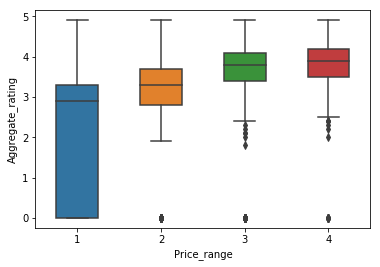

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('data/zomato.csv', encoding = "ISO-8859-1")
df = pd.DataFrame(data)

sns.boxplot(x='Price_range', y='Aggregate_rating', data=data, width=.5)

The box plot above does show a positive correlation (I chose to use a box plot for reasons that will become apparent below); the median Zomato rating does increase as each price range increases.  One interesting thing to note here is the wide IQR of price range 1; while the median rating does remain relatively consistent at 2.9, this group of restaurants is the largest by far with over 4,400 restaurants (nearly half) in the dataset having a price range of 1, so this wide group of data to pull from could widen the range leading to that vast IQR.

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('data/zomato.csv', encoding = "ISO-8859-1")
df = pd.DataFrame(data)

print(df.groupby('Price_range').Aggregate_rating.median())

print("\n")

print(df.groupby('Price_range').Restaurant_ID.count())

Price_range
1    2.9
2    3.3
3    3.8
4    3.9
Name: Aggregate_rating, dtype: float64


Price_range
1    4438
2    3102
3    1387
4     581
Name: Restaurant_ID, dtype: int64


## Implications of the Above Correlation:

The question that remains to be answered from this data analysis is thus: if more expensive restaurants are being rated more highly on Zomato, does that actually speak to the quality of the food being better, or does the diner tend to be more satisfied with a meal by virtue of the fact that they paid more for it?  This is unfortunately not something able to be quantified by this data, but is an interesting thought to ponder should Zomato release a wider breadth of more granular data points.

# Section 2: Analysis by Country

Since we have the dataset broken into location, I thought it would be interesting for us to measure different data points and observe trends broken out by country.  For example, below I have measured average price range of a restaurant and average restaurant rating by country.

In [4]:
d = df.groupby('Country').Price_range.mean().to_frame(name = 'priceranges').reset_index()

Text(0,0.5,'Average Price')

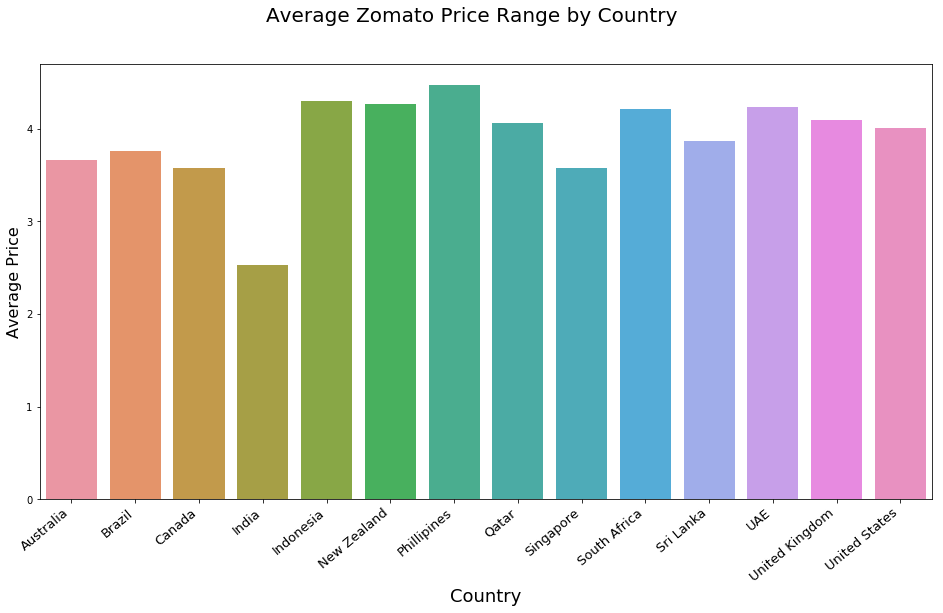

In [63]:
#Average (Mean) Price Range of Restaurant by Country
avg_price = plt.figure(figsize=(16,8))
avg_price.suptitle('Average Zomato Price Range by Country', fontsize=20)
ax = sns.barplot(x="Country", y="ratings", data=r)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=13)
plt.xlabel('Country', fontsize=18)
plt.ylabel('Average Price', fontsize=16)

In [18]:
r = df.groupby('Country').Aggregate_rating.mean().to_frame(name = 'ratings').reset_index()

In [19]:
print(df.groupby('Country').Aggregate_rating.median())

print("\n")

print(df.groupby('Country').Restaurant_ID.count())

Country
Australia         3.70
Brazil            4.15
Canada            3.50
India             3.10
Indonesia         4.30
New Zealand       4.30
Phillipines       4.50
Qatar             4.00
Singapore         3.75
South Africa      4.20
Sri Lanka         4.00
UAE               4.25
United Kingdom    4.10
United States     4.10
Name: Aggregate_rating, dtype: float64


Country
Australia           24
Brazil              60
Canada               4
India             8652
Indonesia           21
New Zealand         40
Phillipines         22
Qatar               20
Singapore           20
South Africa        60
Sri Lanka           20
UAE                 60
United Kingdom      80
United States      425
Name: Restaurant_ID, dtype: int64


The below chart shows the average (mean) Zomato rating of all restaurants in each country.

Text(0,0.5,'Rating')

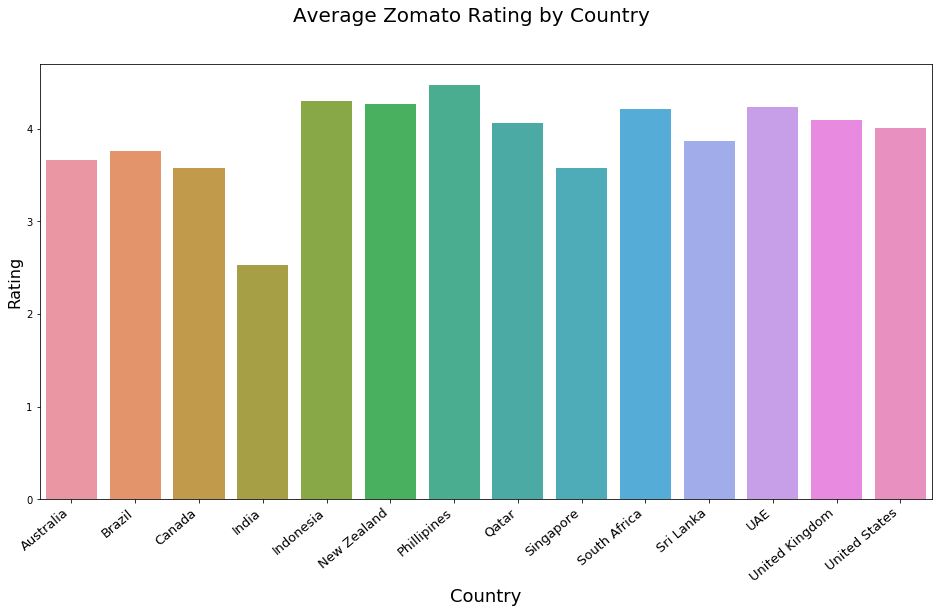

In [52]:
#Average (Mean) Zomato Rating of Restaurant by Country
avg_rating = plt.figure(figsize=(16,8))
avg_rating.suptitle('Average Zomato Rating by Country', fontsize=20)
ax = sns.barplot(x="Country", y="ratings", data=r)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=13)
plt.xlabel('Country', fontsize=18)
plt.ylabel('Rating', fontsize=16)

A major callout here is India; because Zomato is an Indian company, the vast majority of the restaurants being reviewed are in India (8,652 of the 9,508 total, or 91%).  It leaves for us to wonder if there is something to be said here about this.  My personal hypothesis is that because the India restaurant portion of the dataset is so much more vast, it includes a wider variety of restaurants, whereas the other countries are much smaller datasets and perhaps only include nicer or more well-travelled restaurants.

Indeed, we can actually play with our data to use "votes" as a proxy field for prevalence of use.  See below:

Text(0,0.5,'Rating')

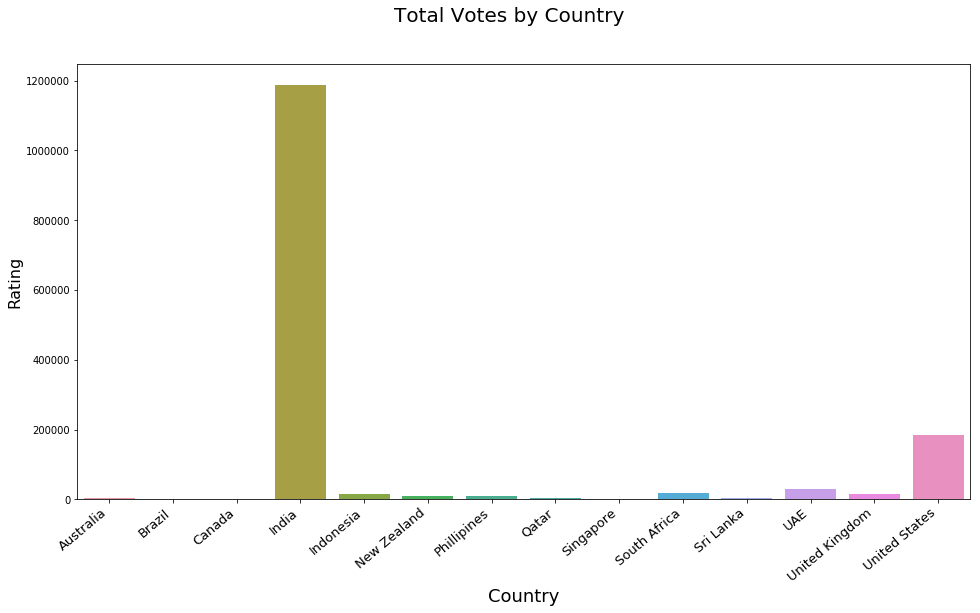

In [27]:
#Number of Votes in aggregate by country
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('data/zomato.csv', encoding = "ISO-8859-1")
df = pd.DataFrame(data)

votes_by_country = df.groupby('Country').Votes.sum().to_frame(name="countryvotes").reset_index()

avg_rating = plt.figure(figsize=(16,8))
avg_rating.suptitle('Total Votes by Country', fontsize=20)
ax = sns.barplot(x="Country", y="countryvotes", data=votes_by_country)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=13)
plt.xlabel('Country', fontsize=18)
plt.ylabel('Rating', fontsize=16)


As you can see, India has over a million votes on restaurant reviews according to this dataset, making it by far the country with the most active usership.

# Section 3: Delivery Data

Zomato also offers delivery options from within the app, so I thought I would take a little time to analyze this data as well.  Interestingly, delivery is only offered through the app in India and United Arab Emirates according to this dataset:

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('data/zomato.csv', encoding = "ISO-8859-1")
df = pd.DataFrame(data)

delivery = df[df.Has_Online_delivery == "Yes"]
print(delivery.groupby('Country').Has_Online_delivery.count())

Country
India    2423
UAE        28
Name: Has_Online_delivery, dtype: int64


As one might expect, the restaurants on Zomato that offer delivery tend to be cheaper:

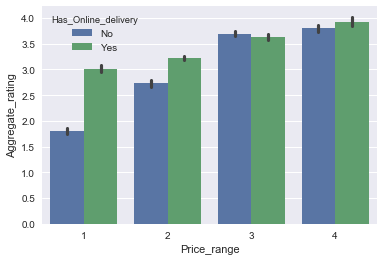

In [78]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('data/zomato.csv', encoding = "ISO-8859-1")
df = pd.DataFrame(data)

sns.barplot(x='Price_range', y='Aggregate_rating', hue='Has_Online_delivery', data=df)

In the above bar plot, restaurants with 1 and 2 dollar sign price ratings deliver more often than not, while it's more even among more expensive places.

# Section 4: Missing Data & Other Potential Analyses

There isn't enough data to analyze some things I would have liked to.  Examples of this include:

### Cuisine:
This WAS included as a column in the dataset but nfortunately, the way the data is organized includes multiple cuisines in one cell for each restaurant, depending on the items served.  Examples of the data herein include entries like "Cafe, Mexican, American, Italian, Lebanese, Continental" for one single item.  In future analyses we could potentially investigate where cells contain a certain cuisine (ie. if the cell has the word "Mexican" or "Biryani" in it anywhere), however this could potentially be misleading especially with broader terms like "American."

### Actual Cost Per Meal:
Data is included for "average_cost_for_two" but this data presents a couple of problems.  First, it's an estimate based on Zomato's definition of what a dinner would consist of, which may or may not be representative of actual spend.  It would be more interesting to gather actual 'spend-per-diner' data and compare that to see if Zomato's "price range" breakouts are actually accurate or not.

# Section 5: Correlations

The most compelling correlation was, as you might guess, between price range of a restaurant and the aggregate rating it received.  There was a weak to moderate positive correlation between these two variables (r approx 0.44).

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

data = pd.read_csv('data/zomato.csv', encoding = "ISO-8859-1")
df = pd.DataFrame(data)

corr = df.corr()
corr['Price_range'].sort_values(ascending=False)

Price_range             1.000000
Aggregate_rating        0.436493
Votes                   0.308788
Country_Code            0.237436
Average_Cost_for_two    0.075626
Longitude              -0.077367
Restaurant_ID          -0.133579
Latitude               -0.173142
Name: Price_range, dtype: float64

## Skew

In [9]:
print('The skew of price range before was', df['Price_range'].skew(), '\nAfter transforming is', np.log(df['Price_range'].skew()))

The skew of price range before was 0.8971145786573277 
After transforming is -0.10857168967688022


In [8]:
print('The skew of aggregate ratings before was', df['Aggregate_rating'].skew(), '\nAfter transforming is', np.log(df['Aggregate_rating'].skew()))

The skew of aggregate ratings before was -0.9510659898236793 
After transforming is nan


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.
